<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General



"Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations."(https://towardsdatascience.com/exploratory-data-analysis)

EDA enables us ask meaningful questions and gain insights on factors that can impact our business.It also aids by informing conclusions and supporting decision making.

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook seeks to document the process undertaken to analyze fundings received by Indian Start-ups from 2018 to 2021.

# Description

This project aims to draw insights on funding received by Indian startups The aim of project is obtain a descriptive overview and a relationship pattern of funding and growth of newly launched startups.

# Questions

1. Which company received the highest amount of funds?

2. Which company received the lowest amount of funds ?

3. Which Industry received the highest amount of funding?

4. Which industry received the lowest amount of funding?

5. Is there a correlation between company age and funds received?

6. Which location recorded the highest amount of funding received?

7. What is the average age of the start-ups?

8. What is the average amount of funding received?

9. How many companies were funded in each year?

# Hypothesis

Null Hypothesis - The sector of a start-up affect the amount of funding received.

Alternate Hypothesis - The sector of a start up does not affect the amount of funding received

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [13]:
# pip install pandas
# pip install numpy 
# pip install matplotlib
# pip install seaborn 
# pip install forex_python
# pip install babel 
# pip install seaborn

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [14]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [246]:
df2018 = pd.read_csv("startup_funding2018.csv")
df2019 = pd.read_csv("startup_funding2019.csv")
df2020 = pd.read_csv("startup_funding2020.csv")
df2021 = pd.read_csv("startup_funding2021.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [16]:
# A quick look at the shape of our dataset

df2018.shape

(526, 6)

In [17]:
#Taking a look at the head of our 2018 Data

df2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [18]:
#Taking a look at the tail of our 2018 Data

df2018.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [19]:
#Look at the columns in the dataset and their data types

df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [250]:
#replacing — with 0 in Amount column
df2018['Amount'] == '—'
df2018[df2018.columns[3: ]] = df2018[df2018.columns[3: ]].replace('[\—,]' , '0' , regex=True)

In [251]:
df2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹4000000000,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹6500000000,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...
522,Happyeasygo Group,"Tourism, Travel",Series A,0,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,₹3500000000,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...


In [252]:
#Creating a new currency and date columns
df2018['Currency'] = np.where(df2018.Amount.str.contains('₹'), 'INR', 'USD')
df2018['Currency_Rate_Date'] = dt.datetime(2018,12,31)
df2018.head(350)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹4000000000,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹6500000000,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31
...,...,...,...,...,...,...,...,...
345,FreightBro,"Apps, B2B, Freight Service, Logistics, SaaS, S...",Seed,0,Mumbai0 Maharashtra0 India,Software for the new-age freight,USD,2018-12-31
346,Finwego,—,Seed,0,Chennai0 Tamil Nadu0 India,Finwego partners with Small and Medium Busines...,USD,2018-12-31
347,Cricnwin,"Digital Entertainment, Fantasy Sports, Gaming,...",Seed,0,Gurgaon0 Haryana0 India,Cricnwin is a Gurugram - based Fan Engagement ...,USD,2018-12-31
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31


In [253]:
#Converting Amount to float
df2018['Amount'] = df2018['Amount'].replace({'\$': '', '\₹': ''}, regex=True).astype(float)
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company Name        526 non-null    object        
 1   Industry            526 non-null    object        
 2   Round/Series        526 non-null    object        
 3   Amount              526 non-null    float64       
 4   Location            526 non-null    object        
 5   About Company       526 non-null    object        
 6   Currency            526 non-null    object        
 7   Currency_Rate_Date  526 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.0+ KB


In [257]:
#Converting Amount to same currency

c = CurrencyRates()
df2018['Amount($)'] = df2018.apply(lambda x: c.convert(x.Currency, 'USD', x.Amount, x.Currency_Rate_Date), axis = 1)
#df_2018['Exchange Rate'] = df_2018['USD']/df_2018['Amount']

exchange_rate = c.get_rate('USD','INR')


df2018.head(50)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount_USD,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00,0.00
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.00,Bengaluru0 Karnataka0 India,Hasura is a platform that allows developers to...,USD,2018-12-31,1600000.00,1600000.00
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,1600000000.00,Kalkaji0 Delhi0 India,Tripshelf is an online market place for holida...,INR,2018-12-31,22977606.87,22977606.87
7,Hyperdata.IO,Market Research,Angel,5000000000.00,Hyderabad0 Andhra Pradesh0 India,Hyperdata combines advanced machine learning w...,INR,2018-12-31,71805021.46,71805021.46
8,Freightwalla,"Information Services, Information Technology",Seed,0.00,Mumbai0 Maharashtra0 India,Freightwalla is an international forwarder tha...,USD,2018-12-31,0.00,0.00
9,Microchip Payments,Mobile Payments,Seed,0.00,Bangalore0 Karnataka0 India,Microchip payments is a mobile-based payment a...,USD,2018-12-31,0.00,0.00


In [269]:
#df2018.drop(['Amount_USD'], axis=1, inplace=True)

df2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00


In [20]:
# A quick look at the shape of our dataset

df2019.shape

(89, 9)

In [21]:
#Taking a look at the head of our 2021 Data

df2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [22]:
#Taking a look at the tail of our 2021 Data

df2019.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [23]:
#Look at the columns in the dataset and their data types

df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [24]:
# A quick look at the shape of our dataset

df2020.shape

(1055, 10)

In [25]:
#Taking a look at the head of our 2021 Data

df2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [26]:
#Taking a look at the tail of our 2021 Data

df2020.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN
1054,Pando,2017,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,"$9,000,000",Series A,NaN


In [27]:
#Look at the columns in the dataset and their data types

df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [28]:
# A quick look at the shape of our dataset

df2021.shape

(1209, 9)

In [29]:
#Taking a look at the head of our 2021 Data

df2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [30]:
#Taking a look at the tail of our 2021 Data

df2021.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B
1208,WeRize,2019.0,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",$8000000,Series A


In [31]:
#Look at the columns in the dataset and their data types

df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


###  Questions

1. Which company received the highest amount of funds?

2. Which company received the lowest amount of funds ?

3. Which Industry received the highest amount of funding?

4. Which industry received the lowest amount of funding?

5. Is there a correlation between company age and funds received?

6. Which location recorded the highest amount of funding received?

7. What is the average age of the start-ups?

8. What is the average amount of funding received?

9. How many companies were funded in each year?

### Hypothesis

Null Hypothesis - The sector of a start-up affect the amount of funding received.

Alternate Hypothesis - The sector of a start up does not affect the amount of funding received

## Issues With The Data

After looking carefully at the data, the following issues were identified

1. The 2018 Dataset had different and fewer columns 
2. The data sets have missing values 
3. Some values are in the wrong columns
4. The datatypes of some of the columns need to be changed
5. One column is unnamed


## How To Handle Issues

1. Analyze the 2018 data separately of the rest 
2. Replace missing data with either N/A or the mode of that column depeding on the column data
3. Move values in the wrong columns to their appropriate columns 
4. Change datatype of columns to appropriate datatypes
5. Rename columns

## Data Preparation 

A careful look at the data shows that df2018 is different from all the other data sets. 
We will combine df2019,df2020 and df2021.

df2018 will cleaned and analyzed separately

In [32]:
#We observe that ithere are dashes in the Amount column. We will replace the dashes(—) with 0
df2018['Amount'] == '—'
df2018[df2018.columns[3: ]] = df2018[df2018.columns[3: ]].replace('[\—,]' , '0' , regex=True)
df2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹4000000000,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹6500000000,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...
522,Happyeasygo Group,"Tourism, Travel",Series A,0,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,₹3500000000,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...


In [33]:
#To differentiate the various currencies in our data set,a new column for currency and date is created 
df2018['Currency'] = np.where(df2018.Amount.str.contains('₹'), 'INR', 'USD')
df2018['Currency_Rate_Date'] = dt.datetime(2018,12,31)
df2018.head(350)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹4000000000,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹6500000000,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31
...,...,...,...,...,...,...,...,...
345,FreightBro,"Apps, B2B, Freight Service, Logistics, SaaS, S...",Seed,0,Mumbai0 Maharashtra0 India,Software for the new-age freight,USD,2018-12-31
346,Finwego,—,Seed,0,Chennai0 Tamil Nadu0 India,Finwego partners with Small and Medium Busines...,USD,2018-12-31
347,Cricnwin,"Digital Entertainment, Fantasy Sports, Gaming,...",Seed,0,Gurgaon0 Haryana0 India,Cricnwin is a Gurugram - based Fan Engagement ...,USD,2018-12-31
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31


In [34]:
#All currency symbols in our column is removed and the amcount is converted into a float
df2018['Amount'] = df2018['Amount'].replace({'\$': '', '\₹': ''}, regex=True).astype(float)
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company Name        526 non-null    object        
 1   Industry            526 non-null    object        
 2   Round/Series        526 non-null    object        
 3   Amount              526 non-null    float64       
 4   Location            526 non-null    object        
 5   About Company       526 non-null    object        
 6   Currency            526 non-null    object        
 7   Currency_Rate_Date  526 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.0+ KB


In [35]:
df2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2.500000e+05,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4.000000e+09,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6.500000e+09,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31
3,PayMe India,"Financial Services, FinTech",Angel,2.000000e+06,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.000000e+00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,2.250000e+08,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...,USD,2018-12-31
522,Happyeasygo Group,"Tourism, Travel",Series A,0.000000e+00,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.,USD,2018-12-31
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7.500000e+03,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...,USD,2018-12-31
524,Droni Tech,Information Technology,Seed,3.500000e+09,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...,INR,2018-12-31


In [36]:
#Converting Amount to same currency

c = CurrencyRates()
df2018['Amount_USD'] = df2018.apply(lambda x: c.convert(x.Currency, 'USD', x.Amount, x.Currency_Rate_Date), axis = 1)
exchange_rate = c.get_rate('USD','INR')


df2018.head(350)


,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount_USD
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2.500000e+05,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,2.500000e+05
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4.000000e+09,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,5.744402e+07
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6.500000e+09,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,9.334653e+07
3,PayMe India,"Financial Services, FinTech",Angel,2.000000e+06,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2.000000e+06
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.000000e+00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.000000e+00
...,...,...,...,...,...,...,...,...,...
345,FreightBro,"Apps, B2B, Freight Service, Logistics, SaaS, S...",Seed,0.000000e+00,Mumbai0 Maharashtra0 India,Software for the new-age freight,USD,2018-12-31,0.000000e+00
346,Finwego,—,Seed,0.000000e+00,Chennai0 Tamil Nadu0 India,Finwego partners with Small and Medium Busines...,USD,2018-12-31,0.000000e+00
347,Cricnwin,"Digital Entertainment, Fantasy Sports, Gaming,...",Seed,0.000000e+00,Gurgaon0 Haryana0 India,Cricnwin is a Gurugram - based Fan Engagement ...,USD,2018-12-31,0.000000e+00
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2.500000e+05,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,2.500000e+05


In [37]:
#Changing how floats look like in our data. We change to 2 decimal places 
pd.options.display.float_format = '{:.2f}'.format

In [38]:
df2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount_USD
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.00,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...,USD,2018-12-31,225000000.00
522,Happyeasygo Group,"Tourism, Travel",Series A,0.00,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.,USD,2018-12-31,0.00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.00,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...,USD,2018-12-31,7500.00
524,Droni Tech,Information Technology,Seed,3500000000.00,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...,INR,2018-12-31,50263515.02


#### Cleaning df2019, df2020 and df2021

In [39]:
#Combing all 3 data sets into a single data frame (DF)

frames = [df2019, df2020, df2021]
  
df= pd.concat(frames)

In [40]:
df

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,NaN
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,NaN
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,NaN
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.00,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,NaN
1205,Vahdam,2015.00,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,NaN
1206,Leap Finance,2019.00,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,NaN
1207,CollegeDekho,2015.00,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,NaN


#### Lets take a look at the unique values in each of the columns to get a general overview of what the table contains

In [41]:
df['Company/Brand'].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', ...,
       'Cogos Technologies', 'Vahdam', 'WeRize'], dtype=object)

In [42]:
df['Founded'].unique()

array([nan, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, '2019', '2018', '2020',
       '2016', '2008', '2015', '2017', '2014', '1998', '2007', '2011',
       '1982', '2013', '2009', '2012', '1995', '2010', '2006', '1978',
       '1999', '1994', '2005', '1973', '-', '2002', '2004', '2001',
       2021.0, 2020.0, 1993.0, 1999.0, 1989.0, 2009.0, 2002.0, 1994.0,
       2006.0, 2000.0, 2007.0, 1978.0, 2003.0, 1998.0, 1991.0, 1984.0,
       2005.0, 1963.0], dtype=object)

In [43]:
df['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan', 'Indore', 'Gurgaon', 'Belgaum', 'Andheri', 'Kolkata',
       'Tirunelveli, Tamilnadu', 'Thane', 'Singapore', 'Gujarat',
       'Kerala', 'Jodhpur', 'Jaipur, Rajastan',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, W

In [44]:
df['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking', 'EdTech',
       'Hygiene management', 'Escrow', 'Networking platform', 'FinTech',
       'Crowdsourcing', 'Food & Bevarages', 'HealthTec

In [45]:
df['What it does'].unique()

array(['Provides a range of male grooming products',
       'A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students',
       'It aims to make learning fun via games.', ...,
       'International education loans for high potential students.',
       'Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals.',
       'India’s first socially distributed full stack financial services platform for small town India'],
      dtype=object)

# Feature Processing
Here is the section to **clean** and **process** the features of the dataset.

### Missing/NaN Values
Each column is cleaned individually by first looking at the total number of empty rows and then extracting thoses rows and handle the missing/NaN values.

### Founded Column

In [46]:
# Total Number of empty rows in the Founded Column 
df['Founded'].isnull().sum()

242

In [47]:
# Extracting the row with  missing data in the Founded column
df[df['Founded'].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,NaN
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN,NaN
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A,NaN
...,...,...,...,...,...,...,...,...,...,...
1043,Quicko,NaN,Ahmedabad,Taxation,Online tax planning and filing platform,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter","$280,000",NaN,NaN
1044,Satin Creditcare,NaN,Gurgaon,Fintech,A micro finance company,NaN,Austrian Bank,"$15,000,000",NaN,NaN
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN


In [48]:
# fill NaN rows with 0

df['Founded'] = df['Founded'].replace(np.nan, 0)

In [49]:
# filling rows with - with 0

df['Founded'] = df['Founded'].replace('-',0)

In [50]:
#Change the datatype of Founded column from Float to int first to remove the decimal

df['Founded'] = df['Founded'].astype(int)

In [51]:
#Replace the missing data in Founders column with 'N/A'

df['Founded'] = df['Founded'].replace(0, 'N/A')

In [52]:
#Change the datatype of Founded column from Float to string 

df['Founded'] = df['Founded'].astype(str)

In [53]:
df

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Bombay Shaving,N/A,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,NaN
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,NaN
2,Eduisfun,N/A,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,NaN
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,NaN
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,NaN
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,NaN
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,NaN
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,NaN


#### Data types of HeadQuater, Sector, What it does, Founders, Investor and Stage are the same.  So we replace all missing data in those columns with 'N/A'

In [54]:
#updating the columns 

df.update(df[['HeadQuarter','Sector','What it does', 'Founders', 'Investor','Stage']].fillna('N/A'))

In [55]:
df

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Bombay Shaving,N/A,N/A,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",N/A,NaN
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,NaN
2,Eduisfun,N/A,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,NaN
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,NaN
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",N/A,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,NaN
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,NaN
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,NaN
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,NaN


### Unnamed Column

In [56]:
# A look at Unnamed: 9 column 

df['Unnamed: 9'].unique()

array([nan, 'Pre-Seed', 'Seed Round'], dtype=object)

In [57]:
# A careful look at the Stage column and the unnamed column shows that data from the stage column, moved to the unanmed column

In [58]:
#Extracting rows with values ie negative na (- na) in the unnamed column. This will enable us deduce which rows have value in the unnamed column
df[-df['Unnamed: 9'].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
611,Walrus,2019,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,Undisclosed,Pre-Seed,Pre-Seed
613,goDutch,N/A,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...","$1,700,000",Seed Round,Seed Round


In [59]:
# Since the column is just a repetition of the Stage column, the unnamed column is droped. 
df.drop('Unnamed: 9', inplace=True, axis=1)

### Stage Column

In [60]:
df['Stage'].unique()

array(['N/A', 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A', 'Pre-seed', 'Seed', 'Pre-series',
       'Debt', 'Pre-series C', 'Pre-series B', 'Bridge', 'Series B2',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
       '$1200000', 'Seed+', 'Series F2', 'Series A+', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I'], dtype=object)

In [61]:
# Stage column also contains amounts. Lets extract the rows with figures in them using the $ sign as our condition . 
df[df['Stage'].str.contains('\$')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [62]:
#Remove all amount values with $ sign in the Stage column and put them in the Amount ($) colum

new = df['Stage'].str.contains('\$')
df.loc[new, ['Stage', 'Amount($)']] = df.loc[new, ['Amount($)', 'Stage']].to_numpy()

In [63]:
#Lets check the column again and make sure the stage column does not have any values with $ sign.

df[df['Stage'].str.contains('\$',na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [64]:
# Lets inspect the stage column by looking at the unique values 
df['Stage'].unique()

array(['N/A', 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A', 'Pre-seed', 'Seed', 'Pre-series',
       'Debt', 'Pre-series C', 'Pre-series B', 'Bridge', 'Series B2',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
       'Upsparks', 'Seed+', 'Series F2', 'Series A+', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', 'ah! Ventures',
       'ITO Angel Network, LetsVenture', 'Early seed', nan,
       'JITO Angel Network, LetsVenture', 'Seies A', 'Serie

In [65]:
# Extract columns with foreign values
df[df['Stage'].str.contains('venture|network|upsparks',case=False, na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Upsparks
111,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Upsparks
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,ah! Ventures
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,"ITO Angel Network, LetsVenture"
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,"JITO Angel Network, LetsVenture"


In [66]:
#replace foreign values with N/A
df.loc[df['Stage'].str.contains('venture|network|upsparks|PE', case=False, na=False), 'Stage'] = 'N/A'  

In [67]:
df['Stage'].unique()

array(['N/A', 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A', 'Pre-seed', 'Seed', 'Pre-series',
       'Debt', 'Pre-series C', 'Pre-series B', 'Bridge', 'Series B2',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
       'Seed+', 'Series F2', 'Series A+', 'Series B3', 'Series F1',
       'Pre-series A1', 'Early seed', nan, 'Seies A', 'Series A2',
       'Series I'], dtype=object)

In [68]:
#replace misspelled stage names with the appropriate stage names 
df['Stage'] = df['Stage'].replace({'Seed+':'Seed','Seed Round & Series A':'Series A','Seies A':'Series A','Series A-1':'Series A',
                                  'Series C,D':'Series C','Seed funding':'Seed','Seed fund':'Seed','Seed round':'Seed'}, regex=True)

### HeadQuater

In [69]:
df['HeadQuarter'].unique()

array(['N/A', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan', 'Indore', 'Gurgaon', 'Belgaum', 'Andheri', 'Kolkata',
       'Tirunelveli, Tamilnadu', 'Thane', 'Singapore', 'Gujarat',
       'Kerala', 'Jodhpur', 'Jaipur, Rajastan',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast,

In [70]:
#remove t#REF!from names in headquarters

df['HeadQuarter'] = df['HeadQuarter'].replace({'\t#REF!': ''}, regex=True)

In [71]:
# from our unique function, we see that food and beverages, pharmaceuticals and Information Technology & Services
# are in our headquarter column. Lets extract them 

df[df['HeadQuarter'].str.contains('Information Technology & Services|Online Media|Pharmaceuticals|Computer Games',case=False, na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,N/A
111,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,N/A
242,Fullife Healthcare,2009,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,N/A
256,Fullife Healthcare,2009,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,N/A
1100,Sochcast,2020,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,N/A
1176,Peak,2014,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [72]:
#moving values from the wrong columns to their appropriate  column

h= df['HeadQuarter'].str.contains('Pharmaceuticals')
df.loc[h, ['HeadQuarter', 'Sector','What it does']] = df.loc[h, ['What it does', 'HeadQuarter','Sector']].to_numpy()

In [73]:
df[df['HeadQuarter'].str.contains('Online Media')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,N/A


In [74]:
#moving values from the wrong columns to their appropriate  column

s=df['HeadQuarter'].str.contains('Online Media')
df.loc[s, ['Sector', 'What it does']] = df.loc[s, ['HeadQuarter','Sector']].to_numpy()

In [75]:
#moving values from the wrong columns to their appropriate  column

t= df['HeadQuarter'].str.contains('Information Technology & Services')
df.loc[t,['HeadQuarter','Sector']] = df.loc[t, ['Sector','HeadQuarter']].to_numpy()

In [76]:
df[df['HeadQuarter'].str.contains('Online Media')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020,Online Media,Online Media,Sochcast is an Audio experiences company that ...,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,N/A


In [77]:
# SInce the HeadQuater of Sochcast cant be determined, we replace it with N/A

df['HeadQuarter']= df['HeadQuarter'].replace({'Online Media':'N/A','Computer Games':'N/A'}, regex = True)

### Sector Column

In [78]:
df['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', 'N/A',
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking', 'EdTech',
       'Hygiene management', 'Escrow', 'Networking platform', 'FinTech',
       'Crowdsourcing', 'Food & Bevarages', 'HealthT

In [79]:
#Extarct wrong sector value 
df[df['Sector'].str.contains('MoEVing is')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021,Gurugram,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,N/A


In [80]:
# Lets put the column values in their right position 
m = df['Sector'].str.contains('MoEVing is')
df.loc[m, ['What it does']]= df.loc[m, ['Sector']].to_numpy()

In [81]:
df['Sector']= df['Sector'].replace({'MoEVing is India\'s only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.':'N/A'}, regex = True)

### Investor Column 

In [82]:
df['Investor'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2353 entries, 0 to 1208
Series name: Investor
Non-Null Count  Dtype 
--------------  ----- 
2353 non-null   object
dtypes: object(1)
memory usage: 36.8+ KB


In [83]:
df[df['Investor'].str.contains('\$')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009,Varun Khanna,Pharmaceuticals,Primary Business is Development and Manufactur...,Morgan Stanley Private Equity Asia,$22000000,Series C,N/A
256,Fullife Healthcare,2009,Varun Khanna,Pharmaceuticals,Primary Business is Development and Manufactur...,Morgan Stanley Private Equity Asia,$22000000,Series C,N/A
257,MoEVing,2021,Gurugram,N/A,MoEVing is India's only Electric Mobility focu...,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,N/A
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,N/A
1100,Sochcast,2020,N/A,Online Media,Sochcast is an Audio experiences company that ...,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,N/A


In [84]:
#moving all the Amounts in the wrong column (Investor) to the appropriate column (Amount($))

i=df['Investor'].str.contains('\$')
df.loc[i, ['Amount($)']]= df.loc[i, ['Investor']].to_numpy()

In [85]:
df[df['Investor'].str.contains('REF')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,N/A


In [86]:
#remove foreign attributes seen the 'Investor' column

df['Investor'] =df['Investor'].replace({'\t#REF!':''}, regex = True)

In [87]:
df[df['Investor'].str.contains('1000')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,$1000000,N/A
1148,Godamwale,2016,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000,Seed,N/A


In [88]:
i=df['Investor'].str.contains('1000')
df.loc[i, ['Amount($)']]= df.loc[i, ['Investor']].to_numpy()

In [89]:
df[df['Investor'].str.contains('1000')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,$1000000,N/A
1148,Godamwale,2016,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000,1000000,N/A


In [90]:
df['Investor'] = df['Investor'].replace({'1000':'N/A'})


### Amount Column

In [91]:
#Replace our nan values with 0

# df['Amount($)'] = df['Amount($)'].replace(np.nan, 0)

In [92]:
#Inspecting the Amount($) column

df['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000', '$200,000', '$340,000', '$45,000,000', '$1,200,000',
       '$660,000,000', '$120,000', '$7,500,000', '$500,000', '$3,000,000',
       '$10,000,000', '$145,000,000', nan, '$21,000,000', '$560

In [93]:
# This code makes it possible to view all rows in a df
# pd.set_option('display.max_rows', None)

In [94]:
# Extract rows that do not have the currency sign $ in the amount column
df[-df['Amount($)'].str.contains('\$', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
5,FlytBase,N/A,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,N/A
6,Finly,N/A,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,N/A
10,Cub McPaws,2010,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,N/A
14,Open Secret,N/A,N/A,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,Undisclosed,N/A
19,Azah Personal Care Pvt. Ltd.,2018,Gurugram,Health,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A
...,...,...,...,...,...,...,...,...,...
827,Rezo.ai,2017,Noida,AI startup,Conversational AI platform - Innovate the way ...,"Manish Gupta, Rashi Gupta","Devesh Sachdev, Bhavesh Manglani",Undisclosed,Seed
833,Polygon,2017,Mumbai,Crypto,Polygon is a blockchain scalability platform.,"Jaynti Kanani, Sandeep Nailwal, Anurag Arjun","Mark Cuban, MiH Ventures",Undisclosed,N/A
846,Ingenium,2018,New Delhi,EdTech,Ingenium Education has been pushing e-learning...,"Pramudit Somvanshi, Mohit Patel, Aakash Gupta",Lead Angels,Undisclosed,Seed
853,Celcius,2020,Mumbai,Logistics,The “ONLINE” Cold Chain network for Reefer tru...,"Swarup Bose, Rajneesh Raman, Arbind Jain",Eaglewings Ventures,Undisclosed,Seed


In [95]:
#replace all values that begin with 'und' in the column with 0- This is to remove all 'undisclosed'
                                           
df.loc[df['Amount($)'].str.contains('und', case=False, na=False), 'Amount($)'] =  0                                    

In [96]:
# remove $ sign and comma sign

df['Amount($)'] = df['Amount($)'].replace({'\$': '', '\,': '','\!':''}, regex=True)

In [97]:
df['Amount($)'].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000', 0,
       '1000000', '20000000', '275000000', '22000000', '5000000',
       '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000', '200000', '340000', '45000000', '1200000', '660000000',
       '120000', '7500000', '500000', '3000000', '10000000', '145000000',
       nan, '21000000', '560000', '275000', '4500000', '390000000',
       '5100000', '700000000', '2300000', '700000', '19000000', '9000000',
       '40000000', '750000', '7800000', '80000000', '1700000', '40000',
       '35000000',

In [98]:
# we can see seed, series c and pre series A in the values of Amount. Extract those rows
df[df['Amount($)'].str.contains('Series C|Seed|Pre-series A', na=False)]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [99]:
#move all stage values from the Amounts ($) column, back to the stage column

n1 = df['Amount($)'].str.contains('Series C|Seed|Pre-series A', na=False)
df.loc[n1, ['Amount($)', 'Stage']] = df.loc[n1, ['Stage', 'Amount($)']].to_numpy()

In [100]:
#confirming that those foreign values are not in the Amount Column

df[df['Amount($)'].str.contains('Series C|Seed|Pre-series A', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [101]:
# Lets remove all commas from the column

#df['Amount($)'] = df['Amount($)'].replace({',': ''}, regex=True)

In [102]:
#When tryimg to turn our column into a float, we got this error "could not convert string to float: '887000 23000000'"
#extract the row with that error 

df[df['Amount($)'].str.contains('887000 23000000', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
465,True Balance,2014,Gurugram,Finance,Earn money by meeting financial needs of your ...,"Charlie, Jay, Martin",Balancehero,887000 23000000,Series C


In [103]:
#Since we cant tell for sure the amount in that row, we will replace it with 0
df['Amount($)'] = df['Amount($)'].replace({'887000 23000000':0 }, regex=True)

In [104]:
#df = df.astype({'Amount($)':'float'})

#could not convert string to float: '800000000 to 850000000'- Another error encoutered when converting column to string 

In [105]:
# replace the above string with the average of both numbers 

df['Amount($)'] = df['Amount($)'].replace({'800000000 to 850000000':((800000000+850000000)/2)}, regex=True)

In [106]:
#replacing N/A with 0

df['Amount($)'] = df['Amount($)'].replace({'N/A':0}, regex=True)

In [107]:
# Rename the Amount($) Column to Amount
df.rename(columns = {'Amount($)':'Amount'}, inplace = True)

In [108]:
# Extract all strings in the Amount column and convert to float 
df['Amount'] = df['Amount'].str.extract('(\d+)').astype(float)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2353 non-null   object 
 1   Founded        2353 non-null   object 
 2   HeadQuarter    2353 non-null   object 
 3   Sector         2353 non-null   object 
 4   What it does   2353 non-null   object 
 5   Founders       2353 non-null   object 
 6   Investor       2353 non-null   object 
 7   Amount         1949 non-null   float64
 8   Stage          2352 non-null   object 
dtypes: float64(1), object(8)
memory usage: 183.8+ KB


In [110]:
df[df['Amount'].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
5,FlytBase,N/A,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,N/A
6,Finly,N/A,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,N/A
10,Cub McPaws,2010,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,NaN,N/A
14,Open Secret,N/A,N/A,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,NaN,N/A
19,Azah Personal Care Pvt. Ltd.,2018,Gurugram,Health,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",NaN,Pre series A
...,...,...,...,...,...,...,...,...,...
1146,MPL,2018,Bangalore,sports,"Mobile Premier League (MPL), is India’s larges...","Sai Srinivas Kiran GV, Shubh Malhotra",Legatum Capital,NaN,Series E
1160,Atomberg Technologies,2012,Mumbai,Consumer Electronics,A maker of energy-efficient smart fans,"Manoj Meena, Sibabrata Das",Ka Enterprises,NaN,N/A
1161,Genext Students,2013,Mumbai,EdTech,LIVE online classes with expert tutors for K-1...,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education,NaN,N/A
1166,OckyPocky,2015,Gurugram,EdTech,OckyPocky is India's 1st interactive English l...,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund",NaN,Seed


In [111]:
#replace all the 0 with the mean 
df['Amount'].replace(to_replace=0, value = df['Amount'].mean(), inplace = True)

In [112]:
#replace the nan values with mean 
df.fillna(df.mean(), inplace=True)

C:\Users\mucha\AppData\Local\Temp\ipykernel_720\3815401649.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [113]:
df[df['Amount'].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage


# Univariate Analysis.

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method .describe() and one of the plotting libraries like Seaborn, Matplotlib, Plotly, etc.

# Answering the questions.

1. Which company received the highest amount of funds?

In [128]:
df.sort_values(['Amount'], ascending = False, inplace=True)
df.head(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
73,Alteria Capital,2018,Mumbai,FinTech,Alteria Capital is a Venture debt firm .,Vinod Murali,N/A,150000000000.00,Debt
280,Reliance Retail Ventures Ltd,2006,Mumbai,Retail,Reliance Retail offers online shopping and a c...,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",70000000000.00,N/A
317,Snowflake,2012,California,Tech company,Snowflake is a cloud data platform that provid...,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group",3000000000.00,N/A
328,Reliance,1973,Mumbai,Multinational conglomerate company,Reliance owns businesses across India engaged ...,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake",2200000000.00,N/A
346,VerSe Innovation,2007,Bangalore,Innovation Management,Owner of Dailyhunt App and I-Pay,Virendra Gupta,"Canaan Valley Capital, Glade Brook Capital Par...",1000000000.00,Series H
935,Dream Sports,2008,Mumbai,Sports,Dream Sports is India’s leading sports technol...,Harsh Jain,"Falcon Edge, DST Global, D1 Capital, Redbird C...",840000000.00,N/A
302,Reliance Retail Ventures,2006,Mumbai,E-commerce,Reliance Retail offers online shopping and a c...,Mukesh Ambani,"General Atlantic, Kohlberg Kravis Roberts",800000000.00,N/A
53,Swiggy,2014,Bangalore,Food delivery,Swiggy is an on-demand food delivery platform ...,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Carmignac, Falcon Edge Capital",800000000.00,N/A
50,PhonePe,2015,New Delhi,FinTech,PhonePe is a mobile payments application that ...,"Burzin Engineer, Rahul Chari, Sameer Nigam",Flipkart,700000000.00,N/A
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.00,N/A


<BarContainer object of 10 artists>

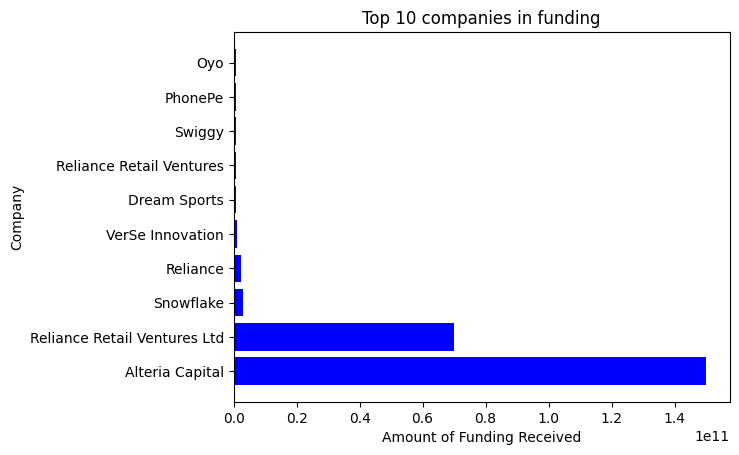

In [146]:
Company = df['Company/Brand'].head(10)
Amount = df['Amount'].head(10)


plt.xlabel('Amount of Funding Received')
plt.ylabel('Company')
plt.title('Top 10 companies in funding')
plt.barh(Company, Amount, color='blue')

2. Which Company received the lowest amount of funds

<BarContainer object of 10 artists>

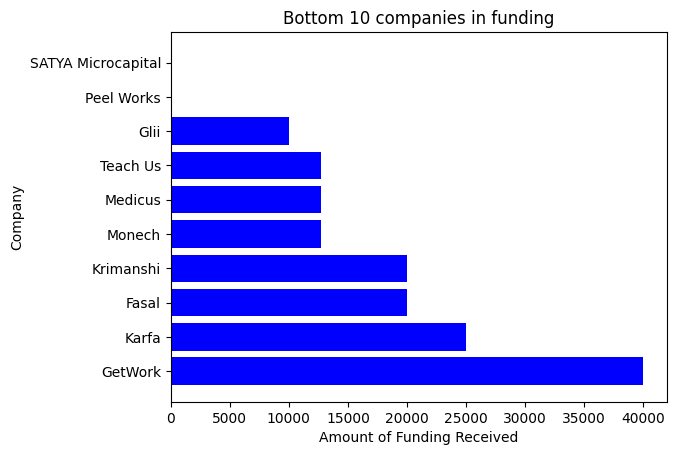

In [147]:
Company = df['Company/Brand'].tail(10)
Amount = df['Amount'].tail(10)


plt.xlabel('Amount of Funding Received')
plt.ylabel('Company')
plt.title('Bottom 10 companies in funding')
plt.barh(Company, Amount, color='blue')

3. Which Industry received the highest amount of funding?

<BarContainer object of 15 artists>

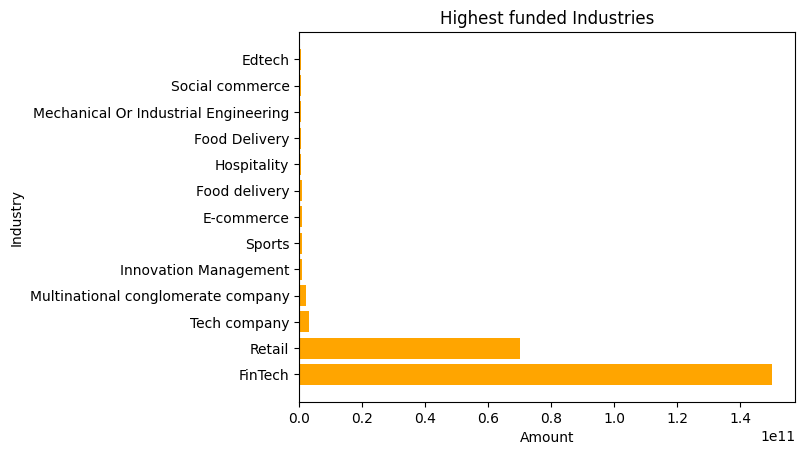

In [158]:
Industry = df['Sector'].head(15)
Amount = df['Amount'].head(15)


plt.xlabel('Amount')
plt.ylabel('Industry')
plt.title('Highest funded Industries')
plt.barh(Industry, Amount, color='Orange')

4. Which industry received the lowest amount of funding?

<BarContainer object of 15 artists>

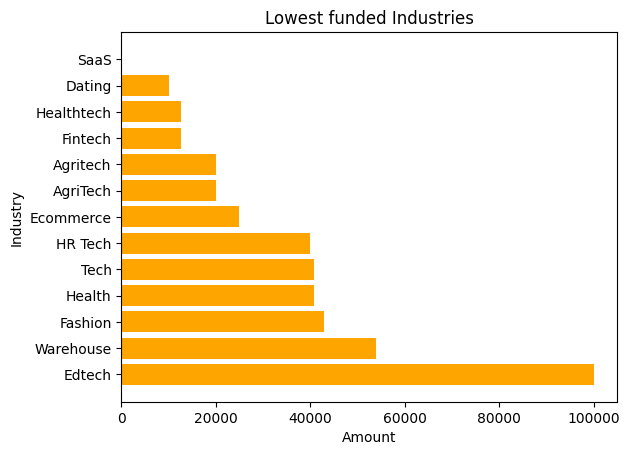

In [157]:
Industry = df['Sector'].tail(15)
Amount = df['Amount'].tail(15)


plt.xlabel('Amount')
plt.ylabel('Industry')
plt.title('Lowest funded Industries')
plt.barh(Industry, Amount, color='Orange')

# Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the correlation and by plotting some charts.

5. Is there a correlation between company age and funds received?

In [163]:
df['Founded'].mode()

0    2019
Name: Founded, dtype: object

In [190]:
#Replacing all N/A values in Founded with the mode
df['Founded'] = df['Founded'].replace({'N/A':'2019'}, regex=True).astype(int)

In [191]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 73 to 552
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2353 non-null   object 
 1   Founded        2353 non-null   int32  
 2   HeadQuarter    2353 non-null   object 
 3   Sector         2353 non-null   object 
 4   What it does   2353 non-null   object 
 5   Founders       2353 non-null   object 
 6   Investor       2353 non-null   object 
 7   Amount         2353 non-null   float64
 8   Stage          2352 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 174.6+ KB


In [192]:
# Creating new coulmn Company_age
df['Company_Age'] = 2023 - df['Founded']

In [198]:
#df.sort_values(['Amount'], ascending = False, inplace=True)
df.sort_values(['Company_Age'], ascending = False, inplace=True)
df.head(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Company_Age
1001,Duroflex,1963,Bangalore,Furniture,"5 decades of experience, superior quality and ...",P. C. Mathew,Norwest Venture Partners,60000000.00,N/A,60
328,Reliance,1973,Mumbai,Multinational conglomerate company,Reliance owns businesses across India engaged ...,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake",2200000000.00,N/A,50
456,Biocon Biologics,1978,Bangalore,BioTechnology,Biocon is a fully integrated pure play biosimi...,Kiran Mazumdar-Shaw,"Goldman Sachs, Tata Capital",70000000.00,N/A,45
152,Biocon,1978,Bangalore,Healthcare,"Biocon is a healthcare and technology, company...",Kiran Mazumdar-Shaw,Goldman Sachs,15000000.00,N/A,45
30,Arya,1982,Noida,AgriTech,"""Simplifying Agribusiness"" Throughout Agri-Sup...","Chattanathan Devarajan, Prasanna Rao, Anand Ch...",Quona Capital,21000000.00,Series B,41
734,Five Star Finance,1984,Chennai,FinTech,Five-Star is a Registered Non Banking Finance ...,V K Ranganathan,"TPG Capital Asia, Epiq Capital",234000000.00,N/A,39
1000,VLCC Health Care,1989,Gurugram,"Health, Wellness & Fitness",VLCC is today widely recognized for its compre...,Vandana Luthra,N/A,4000000.00,N/A,34
61,WESS,1989,Mumbai,Renewable Energy,Waaree is India's Largest Solar Module Manufac...,Hitesh Doshi,Centrum Financial Services,2000000.00,Seed,34
723,Safex Chemicals,1991,New Delhi,AgriTech,Safex Chemicals India Ltd is a leading company...,"SK Jindal, SK Chaudhary",BanyanTree Finance Pvt. Ltd.,50000000.00,N/A,32
15,Tessolve,1993,Bangalore,Electronics,Tessolve Semiconductor offers engineering in s...,"P Raja Manickam, Srinivas Chinamilli, Veerappan V",Novo Tellus Capital,40000000.00,N/A,30


In [212]:
df['Company_Age'].head(50)

1001    60
328     50
456     45
152     45
30      41
734     39
1000    34
61      34
723     32
15      30
295     29
278     29
726     29
81      28
552     28
1157    25
18      25
572     25
683     24
265     24
57      24
777     23
330     23
620     23
755     23
364     23
359     23
1046    22
646     21
263     21
225     21
487     20
1122    19
757     19
4       19
754     19
303     18
955     18
916     17
280     17
313     17
962     17
364     17
165     17
386     17
302     17
140     17
322     16
346     16
823     16
Name: Company_Age, dtype: int32

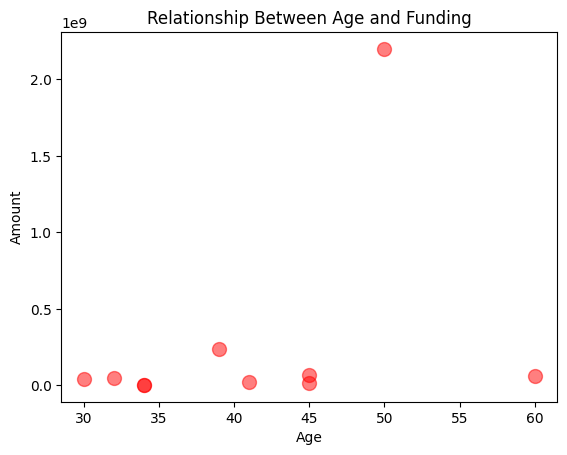

In [224]:
Age = df['Company_Age'].head(10)
Amount = df['Amount'].head(10)





plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Relationship Between Age and Funding')
plt.scatter(Age, Amount, color='red', alpha=0.5, s=100)
plt.show()

6. Which location recorded the highest amount of funding received?

In [225]:
df.sort_values(['Amount'], ascending = False, inplace=True)
df.head(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Company_Age
73,Alteria Capital,2018,Mumbai,FinTech,Alteria Capital is a Venture debt firm .,Vinod Murali,N/A,150000000000.00,Debt,5
280,Reliance Retail Ventures Ltd,2006,Mumbai,Retail,Reliance Retail offers online shopping and a c...,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",70000000000.00,N/A,17
317,Snowflake,2012,California,Tech company,Snowflake is a cloud data platform that provid...,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group",3000000000.00,N/A,11
328,Reliance,1973,Mumbai,Multinational conglomerate company,Reliance owns businesses across India engaged ...,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake",2200000000.00,N/A,50
346,VerSe Innovation,2007,Bangalore,Innovation Management,Owner of Dailyhunt App and I-Pay,Virendra Gupta,"Canaan Valley Capital, Glade Brook Capital Par...",1000000000.00,Series H,16
935,Dream Sports,2008,Mumbai,Sports,Dream Sports is India’s leading sports technol...,Harsh Jain,"Falcon Edge, DST Global, D1 Capital, Redbird C...",840000000.00,N/A,15
302,Reliance Retail Ventures,2006,Mumbai,E-commerce,Reliance Retail offers online shopping and a c...,Mukesh Ambani,"General Atlantic, Kohlberg Kravis Roberts",800000000.00,N/A,17
53,Swiggy,2014,Bangalore,Food delivery,Swiggy is an on-demand food delivery platform ...,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Carmignac, Falcon Edge Capital",800000000.00,N/A,9
50,PhonePe,2015,New Delhi,FinTech,PhonePe is a mobile payments application that ...,"Burzin Engineer, Rahul Chari, Sameer Nigam",Flipkart,700000000.00,N/A,8
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.00,N/A,10


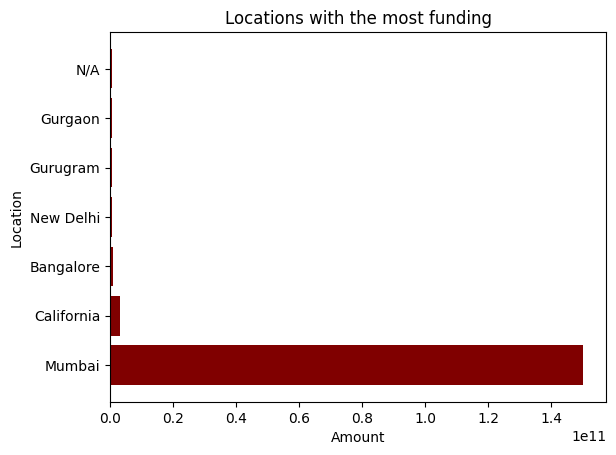

In [236]:
Location = df['HeadQuarter'].head(20)
Amount = df['Amount'].head(20)





plt.xlabel('Amount')
plt.ylabel('Location')
plt.title('Locations with the most funding')
plt.barh(Location, Amount, color='maroon')
plt.show()

7. What is the average age of the start-ups?

In [238]:
df['Company_Age'].mean()

6.6187845303867405

8. What is the average amount of funding received?

In [239]:
df['Amount'].mean()

140466660.7773217

9. How many companies were funded in each year?

In [240]:
df2018['Amount'].notnull().sum()

526

In [242]:
df2019['Amount($)'].notnull().sum()

89

In [243]:
df2020['Amount($)'].notnull().sum()

1052

In [244]:
df2021['Amount($)'].notnull().sum()

1206

# Hypothesis

Null Hypothesis - The sector of a start-up affect the amount of funding received.

Alternate Hypothesis - The sector of a start up does not affect the amount of funding received